# Graph Embedding

Graph Embedding is a technique to represent graph data in a continuous vector space. It is a fundamental technique in graph analysis and machine learning. In this tutorial, we will introduce some basic methods to compute a graph embedding. These methods will be extended to graph kernels, which generalize graph embedding concepts.

To this end, we will focus on two chemical datasets : MUTAG and Acyclic. These datasets are composed of graphs representing molecules. The goal is to predict the mutagenicity of a molecule in the case of the MUTAG dataset and to predict the boiling points of molecules in the case of the Acyclic dataset.

For MUTAG, node features encodes the atom type of each node as a one hot encoding.

For Acyclic, the first eleven node features encode the atom type of each node as a one hot encoding, the 11st feature encoding an "unknown" atom. The 12nd feature is the node degree and the last three features are 3D coordinates of the node, generally set to `0.0`.

In [39]:
%matplotlib inline

/home/bgauzere/Projets/Cours GNN Cote d'Ivoire/gml-cours/practical/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [9]:
import networkx as nx
from torch_geometric.datasets import TUDataset
mutag_dataset = TUDataset(root='./MUTAG', name='MUTAG')

# Display basic information about the dataset
print(f'Dataset: {mutag_dataset}:')
print(f'Number of graphs: {len(mutag_dataset)}')
print(f'Number of features for each node : {mutag_dataset.num_features}')
print(f'Number of classes: {mutag_dataset.num_classes}')
print(f'Number of edge features: {mutag_dataset[0].x}')



Dataset: MUTAG(188):
Number of graphs: 188
Number of features for each node : 7
Number of classes: 2
Number of edge features: tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])


Processing...
Done!


In [10]:

from greycdata.datasets import GreycDataset
acyclic_dataset = GreycDataset(root='./Acyclic', name='Acyclic')


# Display basic information about the dataset
print(f'Dataset: {acyclic_dataset}:')
print(f'Number of graphs: {len(acyclic_dataset)}')
print(f'Number of features for each node : {acyclic_dataset.num_features}')
print(f'Boiling points: {acyclic_dataset.y}')
print(f'Nodes features for first graph: {acyclic_dataset[0].x}')



Dataset: Acyclic:
Number of graphs: 183
Number of features for each node : 15
Boiling points: tensor([-23.7000,  14.0000,  37.3000, 109.7000,  10.8000,  39.0000,  42.0000,
         66.6000, 135.0000, 148.5000,  40.0000,  34.6000,  32.0000,  63.0000,
         53.5000,  64.4000,  84.7000,  95.5000,  92.0000,  84.4000, 154.0000,
        156.0000, 166.0000, 183.0000,  70.3000,  63.6000,  52.5000,  59.0000,
         59.5000,  55.2000,  88.0000,  83.0000, 104.5000, 102.0000,  92.0000,
        107.4000, 123.2000, 112.5000, 118.5000, 101.5000, 173.7000, 165.5000,
        181.0000,  99.5000,  92.3000,  90.1000,  80.2000,  82.0000,  91.2000,
         91.5000,  81.2000,  93.0000,  69.0000,  86.3000,  82.0000, 103.0000,
        103.5000,  96.0000, 112.0000, 104.0000, 132.5000, 123.5000, 120.3000,
        145.0000, 144.2000, 142.8000, 132.0000, 134.2000, 137.0000, 139.0000,
        133.6000, 120.4000, 120.0000, 137.0000, 195.8000, 177.2000, 181.0000,
        185.9000, 175.7000, 186.0000, 211.0000, 

/home/bgauzere/Projets/Cours GNN Cote d'Ivoire/gml-cours/practical/greycdata/datasets.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.loa

# Explicit embedding

## Sum of nodes embedding

As discussed during the lesson, a first approach to graph embedding is to sum the node features. This method is simple and can be used as a baseline. 

Let's compute the sum of nodes embedding for the MUTAG dataset. Using t-SNE, plot the graphs in a 2D space.

In [ ]:
import torch

# Initialize an empty list to store the sum of features for each graph
mutag_feature_sums = []

# Iterate over each graph in the MUTAG dataset
for graph in mutag_dataset:
    # Sum the features of all nodes in the graph
    feature_sum = torch.sum(graph.x, dim=0)
    mutag_feature_sums.append(feature_sum)

# Convert the list to a matrix (tensor)
mutag_feature_matrix = torch.stack(mutag_feature_sums)

print(mutag_feature_matrix)


tensor([[14.,  1.,  2.,  ...,  0.,  0.,  0.],
        [ 9.,  2.,  2.,  ...,  0.,  0.,  0.],
        [ 9.,  2.,  2.,  ...,  0.,  0.,  0.],
        ...,
        [ 8.,  2.,  2.,  ...,  0.,  0.,  0.],
        [18.,  1.,  2.,  ...,  0.,  0.,  0.],
        [12.,  2.,  2.,  ...,  0.,  0.,  0.]])


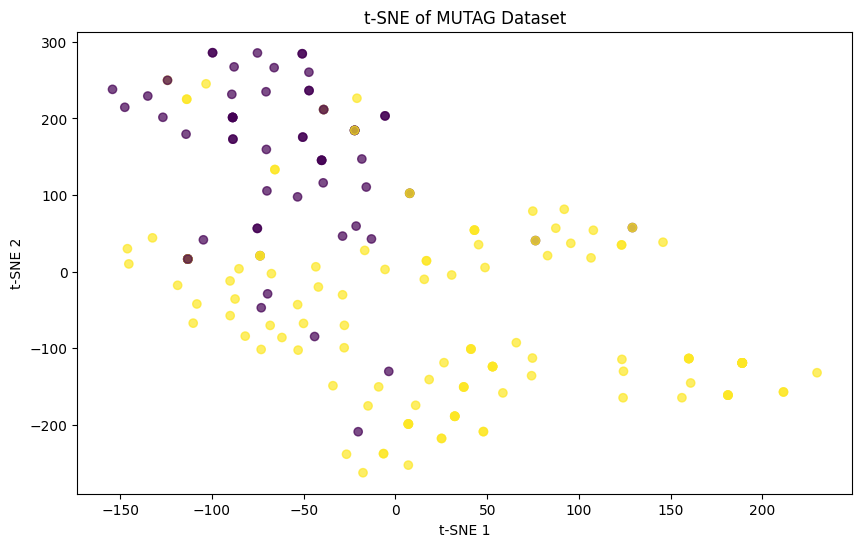

In [13]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Extract the labels (y) for each graph
labels = [graph.y.item() for graph in mutag_dataset]

# Perform t-SNE on the feature matrix
tsne = TSNE(n_components=2, random_state=42)
mutag_tsne = tsne.fit_transform(mutag_feature_matrix.detach().numpy())

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(mutag_tsne[:, 0], mutag_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('t-SNE of MUTAG Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Using the embedding, learn a classifier to predict the mutagenicity of a molecule. Evaluate the performance of the classifier using the accuracy score on a test set.

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize a list to store the accuracy for each run
accuracies = []

# Repeat the process 10 times
for _ in range(10):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(mutag_feature_matrix, labels, test_size=0.2, random_state=42)
    
    # Initialize the SVM classifier
    svm = SVC()
    
    # Train the SVM classifier
    svm.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = svm.predict(X_test)
    
    # Compute the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Compute the average accuracy
average_accuracy = np.mean(accuracies)

print(f'Average accuracy over 10 runs: {average_accuracy:.2f}')

Average accuracy over 10 runs: 0.87


What kind of features you may add to improve the representative power of the embedding?

Number of nodes, number of edges, density, distribution des étiquettes d'arêtes.

# Graph Kernels

Graph kernels constitute a generalization of graph embedding. A graph kernel is a function that computes a similarity score between two graphs. This similarity score can be used as a feature in a machine learning model. During the lesson, we focus on two graph kernels : bags of patterns and weifeiler lehman kernels. 

## Bags of patterns kernels

The idea behind bags of patterns kernels is to count the number of common substructures between two graphs. A substructure is a subgraph that appears in both graphs. The kernel is then the dot product between the substructure counts.

Therefore, one has to define a set of substructures to count. In this tutorial, we will use the labeled paths up to a length d. We can also use the set of graphlets, treelets or cycles.

To compute graph kernels, we can rely on the grakel or graphkit-learn libraries. These libraries provide an implementation of several graph kernels. We can also implement by ourselves the computation of graph kernels.

Transform the pytorch graphs into networkx graphs so as they are compatible with the graphkit-learn library

In [26]:
from torch_geometric.utils import to_networkx
acyclic_nx = [to_networkx(g, node_attrs='x',to_undirected=True) for g in acyclic_dataset]

In [34]:
acyclic_nx[0].nodes(data=True)

for g in acyclic_nx:
    for node in g.nodes():
        g.nodes[node]['x'] = tuple(g.nodes[node]['x'])
acyclic_nx[0].nodes(data=True)
        

NodeDataView({0: {'x': (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)}, 1: {'x': (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)}, 2: {'x': (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0)}})

Implement a `PathUpToH` kernel using the graph kit learn library. How the number of substructures are compared ? 

In [ ]:

from gklearn.kernels import PathUpToH


# Initailize parameters for graph kernel computation.
kernel_options = {'depth': 5,'k_func': 'tanimoto','compute_method': 'trie'}

# Initialize graph kernel.
graph_kernel = PathUpToH(node_labels=['x'], # list of node label names.
						 edge_labels=[],
						 **kernel_options, # options for computation.
						 )

# Compute Gram matrix.
gram_matrix_path, run_time = graph_kernel.compute(acyclic_nx)


Visualize the Gram matrix and check if it is semi positive definite.

-3.885588456436954e-16


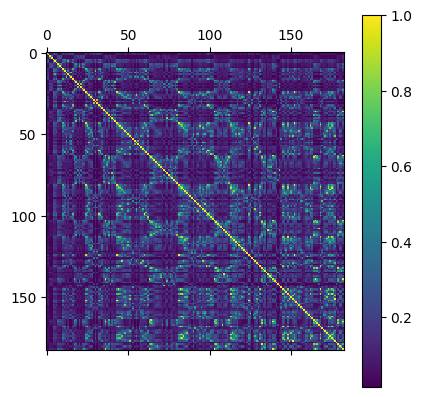

In [ ]:
from scipy.linalg import eigh

plt.matshow(gram_matrix_path)
plt.colorbar()

# Compute the eigenvalues and eigenvectors of the Gram matrix
eigenvalues, eigenvectors = eigh(gram_matrix_path)
print(np.min(eigenvalues))

Do the same with the treelet kernel. How the substructures differs from the path kernel?

In [103]:

import functools
from gklearn.kernels import Treelet
from gklearn.utils.kernels import gaussian_kernel


graph_kernel = Treelet(node_labels=['x'], # list of node label names.
					   sub_kernel=functools.partial(gaussian_kernel, gamma=.001),
						ds_infos={'directed':False}
					)

gram_matrix_treelet, run_time = graph_kernel.compute(acyclic_nx)


getting canonkeys: 183it [00:00, 1656.12it/s]
Computing kernels: 16836it [00:02, 7569.14it/s] 
Gram matrix of size 183 built in 3.0025343894958496 seconds.


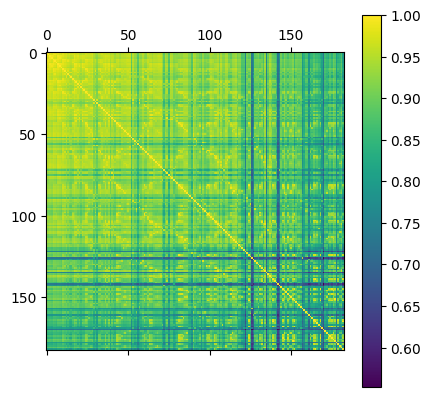

In [96]:
plt.matshow(gram_matrix_treelet)
plt.colorbar()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV

def evaluate_kernel_performance(gram_matrix, y, kernel_name):

    # Initialize a list to store the MAE for each run
    maes = []

    # Repeat the process 10 times
    for _ in range(10):
        # Split the data into training and test sets
        train_index, test_index = train_test_split(np.arange(len(gram_matrix)), test_size=0.2, random_state=42)
        # Split the Gram matrix into training and test sets
        X_train, X_test = gram_matrix[train_index][:, train_index], gram_matrix[test_index][:, train_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize the SVM regressor with precomputed kernel
        # Define the parameter grid
        param_grid = {
            'C': [0.1, 1, 10, 100, 1000],
            'epsilon': [0.01, 0.1, 1, 10]
        }

        # Initialize the SVR with precomputed kernel
        svr = SVR(kernel='precomputed')

        # Initialize GridSearchCV
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

        # Train the SVR regressor with grid search
        grid_search.fit(X_train, y_train)

        # Get the best estimator
        svr = grid_search.best_estimator_

        # Predict the labels for the test set
        y_pred = svr.predict(X_test)

        # Compute the MAE
        mae = mean_absolute_error(y_test, y_pred)

        # Append the MAE to the list
        maes.append(mae)

    # Compute the average MAE
    average_mae = np.mean(maes)
    print(f'Average MAE over 10 runs using {kernel_name} kernel: {average_mae:.2f}')
    return average_mae

# Evaluate performance using Treelet kernel
average_mae_treelet = evaluate_kernel_performance(gram_matrix_treelet, acyclic_dataset.y, "Treelet")

# Evaluate performance using Path kernel
average_mae_path = evaluate_kernel_performance(gram_matrix_path, acyclic_dataset.y, "Path")

Average MAE over 10 runs using Treelet kernel: 5.31
Average MAE over 10 runs using Path kernel: 19.27


### WL-kernel

In [117]:
from gklearn.kernels import WeisfeilerLehman
from gklearn.kernels import weisfeilerlehmankernel


graph_kernel = WeisfeilerLehman(node_labels=['x'], # list of node label names.
					   ds_infos={'directed':False},height=0,                    
                       verbose=0
					)

gram_matrix_wl, run_time = weisfeilerlehmankernel(acyclic_nx, height=3)




 --- Weisfeiler-Lehman subtree kernel matrix of size 183 built in 0.37072134017944336 seconds ---


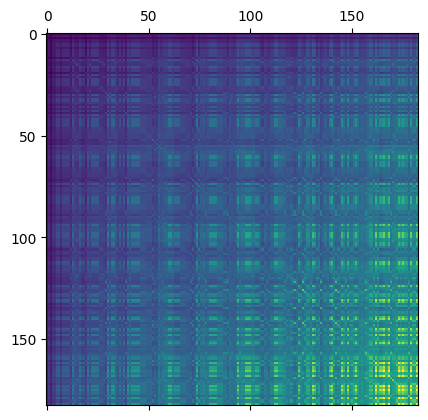

In [ ]:
plt.matshow(gram_matrix_wl)


In [119]:

# Evaluate performance using Treelet kernel
average_mae_treelet = evaluate_kernel_performance(gram_matrix_treelet, acyclic_dataset.y, "Treelet")

# Evaluate performance using Path kernel
average_mae_path = evaluate_kernel_performance(gram_matrix_path, acyclic_dataset.y, "Path")

average_mae_wl = evaluate_kernel_performance(gram_matrix_wl, acyclic_dataset.y, "WL")


Average MAE over 10 runs using Treelet kernel: 5.31
Average MAE over 10 runs using Path kernel: 19.27
Average MAE over 10 runs using WL kernel: 20.47


## Experiments on MUTAG dataset and Acyclic

Experiment different graph kernels on the MUTAG and Acyclic datasets, and tune the numerous hyper parameters to find the best kernel !

If you want, don't hesitate to use the `grakel` library to compute the graph kernels.